# **0. 라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score

#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action = 'ignore')

# **1. 데이터 불러오기**

## **📌 Data Description**
- index: 구분자
- quality: 품질(target 변수) - 범주형
- fixed acidity: 산도
- volatile acidity: 휘발성산
- citric acid: 시트르산
- residual sugar: 잔당(발효 후 와인 속에 남아있는 당분)
- chlorides: 염화물
- free sulfur dioxide: 독립 이산화황
- total sulfur dioxide: 총 이산화황
- density: 밀도
- pH: 수소이온농도
- sulphates: 황산염
- alcohol: 도수
- type: 종류(white vs red)

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
### train 데이터
# index를 제외하면 총 13개 변수를 가짐
# quality(와인의 품질) - target 변수

train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [4]:
### test 데이터
# index를 제외하면 총 12개 변수를 가짐

test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


- 와인의 종류에 따라 성질과 품질이 달라질 것이라고 판단함
    - red 와인과 white 와인을 **분리**한 후, 각각에 대한 품질 분류 모델 생성

In [5]:
white_train = train.loc[train['type'] == 'white',:]
white_test = test.loc[test['type'] == 'white',:]

In [6]:
# 이후 submission.csv 파일을 만들기 위해 white wine의 원래 위치 index를 저장

white_idx = list(white_test['index'])

In [7]:
white_train = white_train.reset_index(drop = True)
white_test = white_test.reset_index(drop = True)

# **2. 데이터 전처리 & EDA**

In [8]:
### 필요없는 변수 제거
# index는 불필요한 변수이므로 삭제

white_train = white_train.drop(['index','type'], axis = 1)
white_test = white_test.drop(['index','type'], axis = 1)

## **2-2. 데이터 구조 확인**

In [9]:
### train 데이터의 column 정보 확인

white_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               4159 non-null   int64  
 1   fixed acidity         4159 non-null   float64
 2   volatile acidity      4159 non-null   float64
 3   citric acid           4159 non-null   float64
 4   residual sugar        4159 non-null   float64
 5   chlorides             4159 non-null   float64
 6   free sulfur dioxide   4159 non-null   float64
 7   total sulfur dioxide  4159 non-null   float64
 8   density               4159 non-null   float64
 9   pH                    4159 non-null   float64
 10  sulphates             4159 non-null   float64
 11  alcohol               4159 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 390.0 KB


In [10]:
### test 데이터의 column 정보 확인

white_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         739 non-null    float64
 1   volatile acidity      739 non-null    float64
 2   citric acid           739 non-null    float64
 3   residual sugar        739 non-null    float64
 4   chlorides             739 non-null    float64
 5   free sulfur dioxide   739 non-null    float64
 6   total sulfur dioxide  739 non-null    float64
 7   density               739 non-null    float64
 8   pH                    739 non-null    float64
 9   sulphates             739 non-null    float64
 10  alcohol               739 non-null    float64
dtypes: float64(11)
memory usage: 63.6 KB


- type을 제외하고는 모두 숫자형 변수이다.
- 결측치는 존재하지 않는다.

In [11]:
white_train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000
mean,5.877374,6.856937,0.277772,0.334114,6.372025,0.045611,35.111806,137.905506,0.994010,3.189445,0.489339,10.527956
std,0.883206,0.847041,0.100247,0.121749,5.068508,0.021484,16.966973,42.567422,0.003009,0.151375,0.113240,1.232421
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991715,3.090000,0.410000,9.500000
50%,6.000000,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.480000,10.400000
75%,6.000000,7.300000,0.320000,0.390000,9.800000,0.050000,46.000000,167.000000,0.996040,3.280000,0.550000,11.400000
max,9.000000,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


- 데이터들 간의 스케일 차이가 존재함을 확인할 수 있다.
    - 표준화(StandardScaler) 진행
- 데이터 중 일부 이상치가 존재함을 짐작할 수 있다.

## **2-3. 데이터 분포 확인**

### **a) Target 값의 분포**

In [12]:
white_train['quality'].value_counts()

6    1881
5    1217
7     755
4     145
8     139
3      17
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

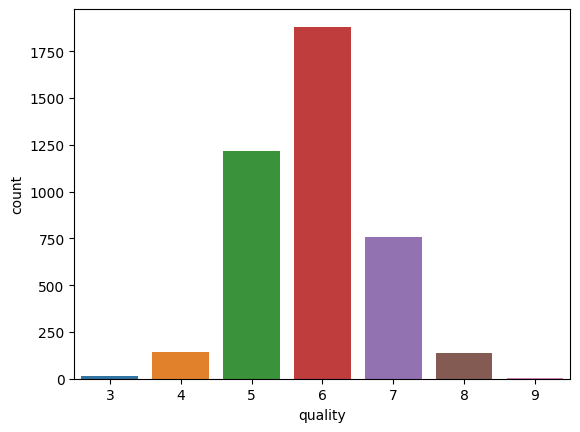

In [13]:
sns.countplot(x = white_train['quality'])

- quality의 클래스가 너무 많다.
    - 5,6이 대부분
    - 나머지는 매우 적은 수
- 품질을 모아서 4개의 클래스로 재분류
    - 3 + 4 => 4 (worst)
    - 5 (bad)
    - 6 (good)
    - 7 + 8 + 9 => 7 (best)

In [14]:
### 클래스 재분류

white_train.loc[white_train['quality'] <= 4, 'new_quality'] = 4
white_train.loc[white_train['quality'] == 5, 'new_quality'] = 5
white_train.loc[white_train['quality'] == 6, 'new_quality'] = 6
white_train.loc[white_train['quality'] >= 7, 'new_quality'] = 7

In [15]:
# 클래스이기에 int 형으로 변환해주기

white_train = white_train.astype({'new_quality':'int32'})

In [16]:
white_train['new_quality'].value_counts()

6    1881
5    1217
7     899
4     162
Name: new_quality, dtype: int64

<AxesSubplot:xlabel='new_quality', ylabel='count'>

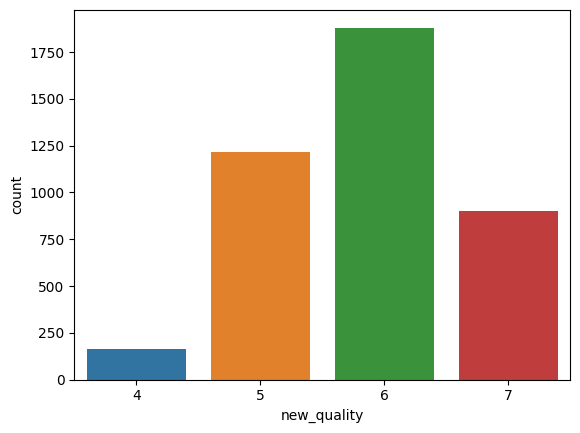

In [17]:
sns.countplot(x = white_train['new_quality'])

In [18]:
### 기존 quality 제거

white_train = white_train.drop('quality', axis = 1)

In [19]:
white_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,5
1,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5
2,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,6
3,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,6
4,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,6


### **b) 각 feature 변수들의 분포**

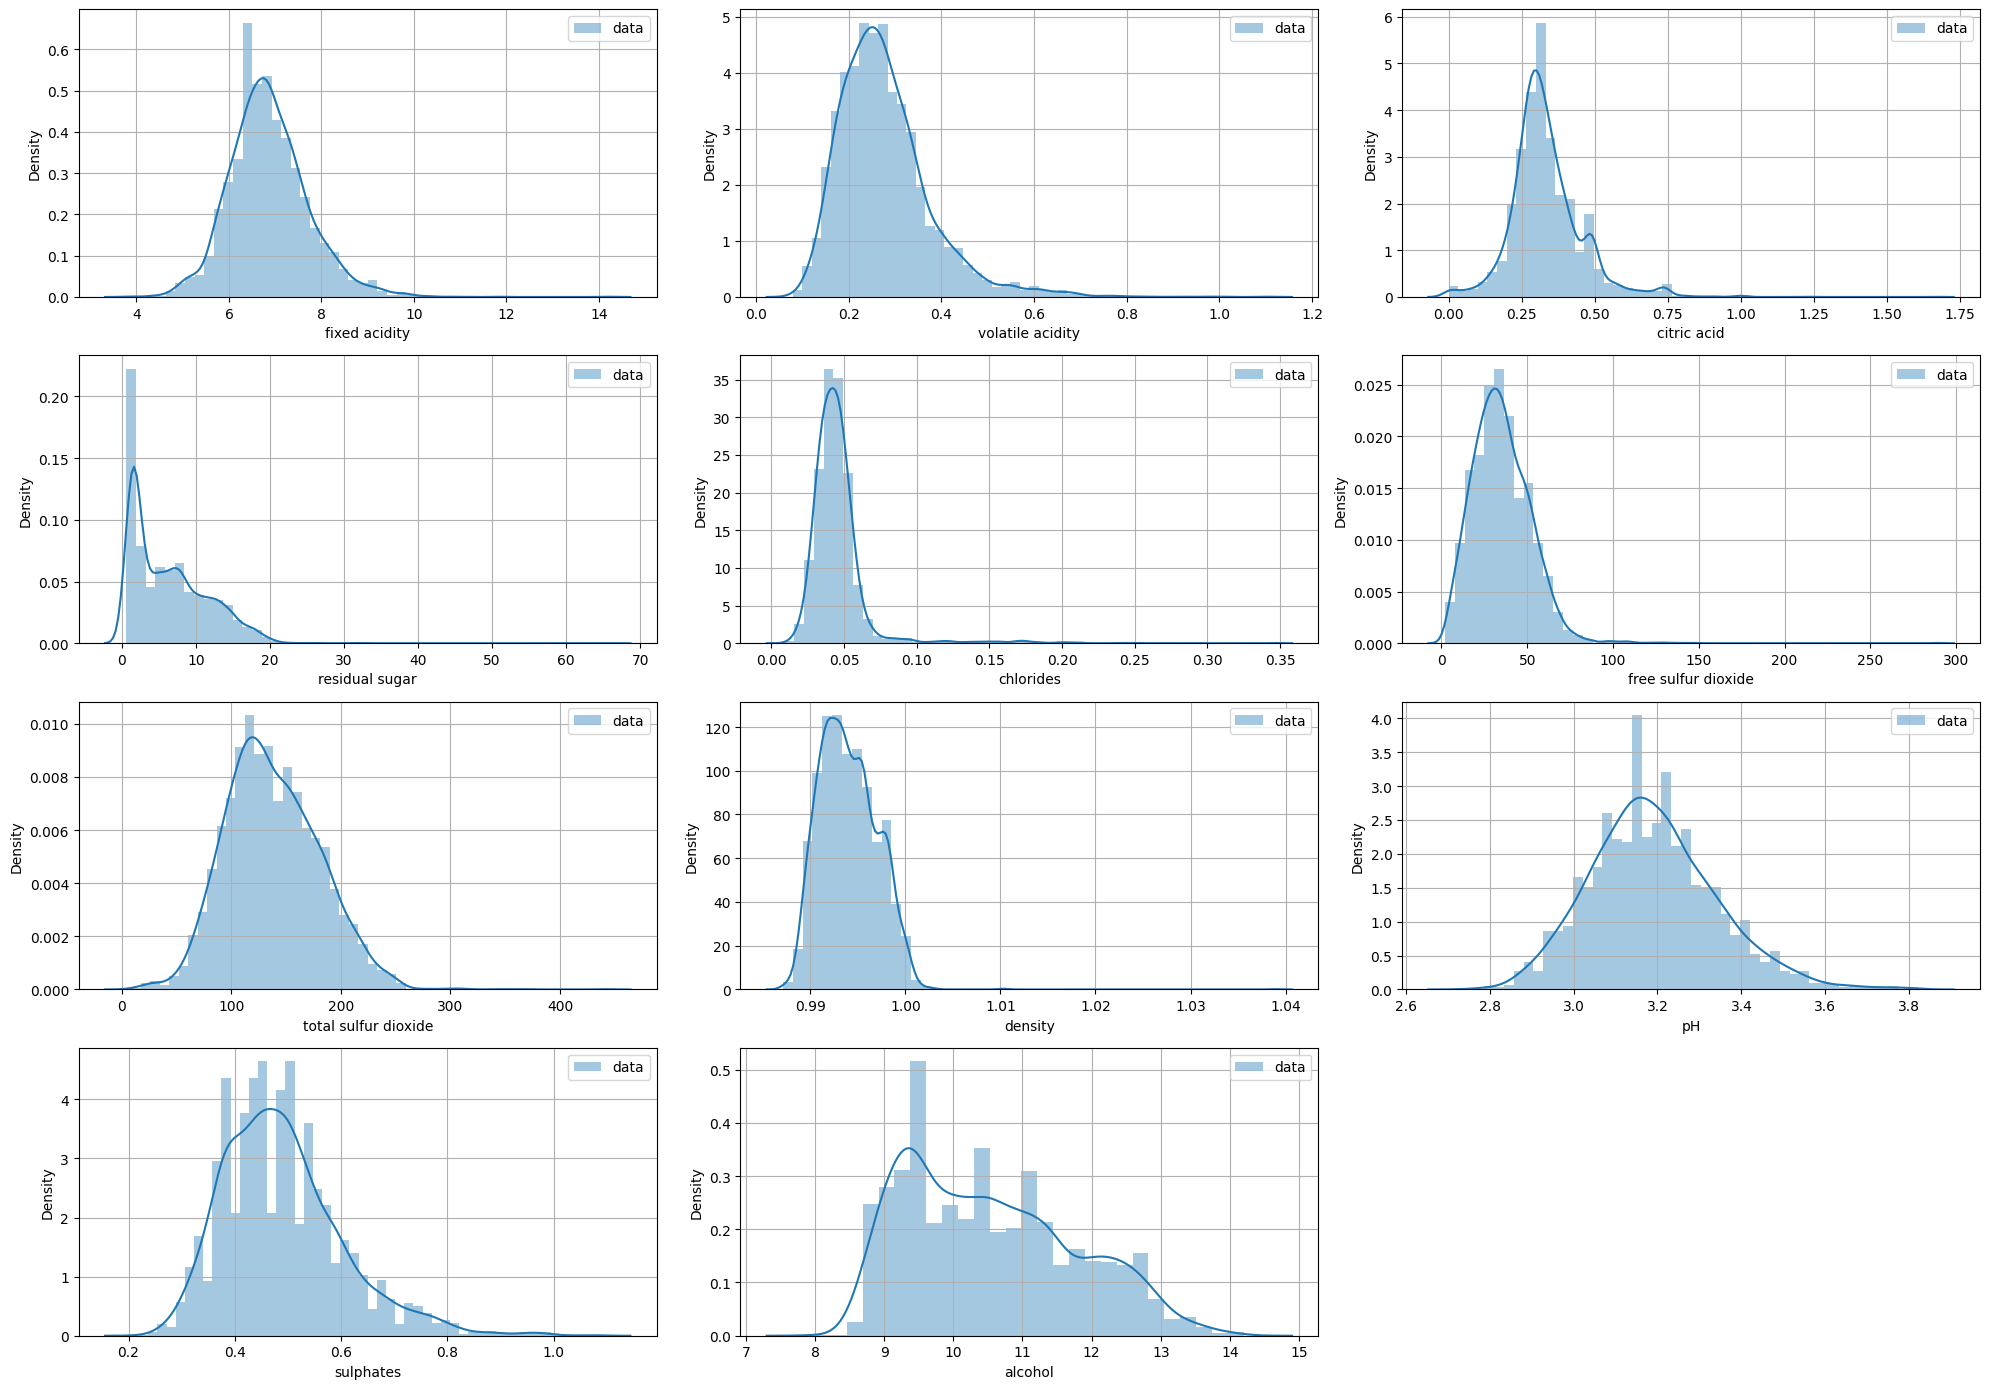

In [20]:
### 변수별 분포 시각화

plt.figure(figsize = (20,14))

for i, col in enumerate(list(white_train.iloc[:,:-1].columns.values)):
    plt.subplot(4,3,i+1) # 위치 지정
    sns.distplot(white_train[col], kde = True, label = 'data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- 대부분의 feature들이 분포에 편향이 있다고 판단된다.(오른쪽으로 긴 꼬리, **positively skewed**)
    - 데이터 변환 방법: 제곱근(square root), 세제곱근(cube root), **로그 변환(log transformation)**

In [21]:
### 각 변수들의 왜도(skewness) 확인

from scipy.stats import skew

features_idx = white_train.dtypes[white_train.dtypes != 'object'].index
skew_features = white_train[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.202629


In [22]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides              4.991482
volatile acidity       1.562741
free sulfur dioxide    1.528219
citric acid            1.327980
residual sugar         1.149807
density                1.103999
dtype: float64


### **c) 각 feature 변수와 target 변수 간의 관계**

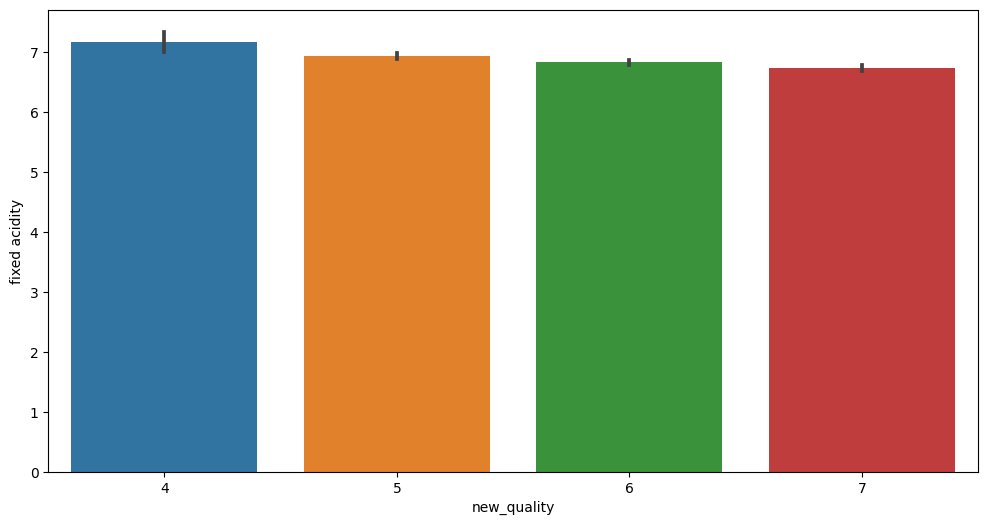

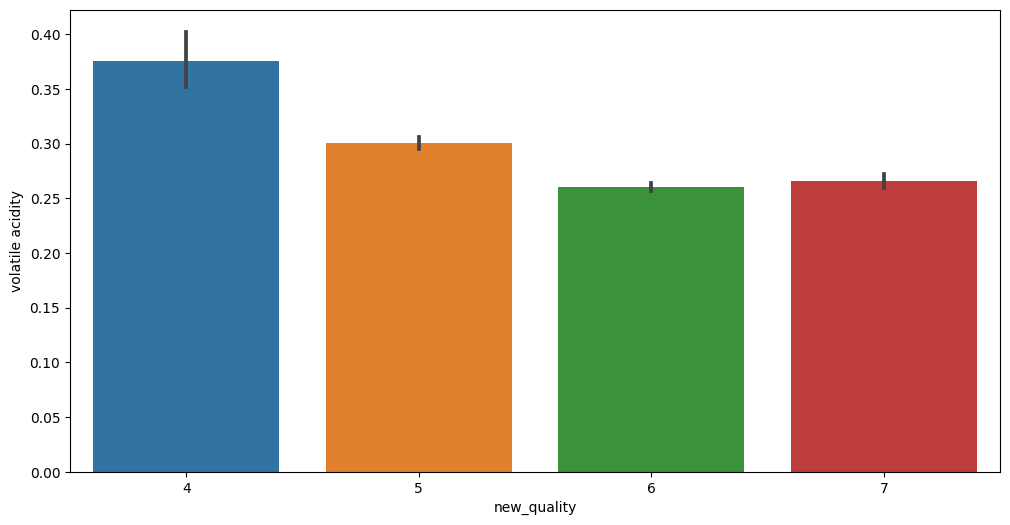

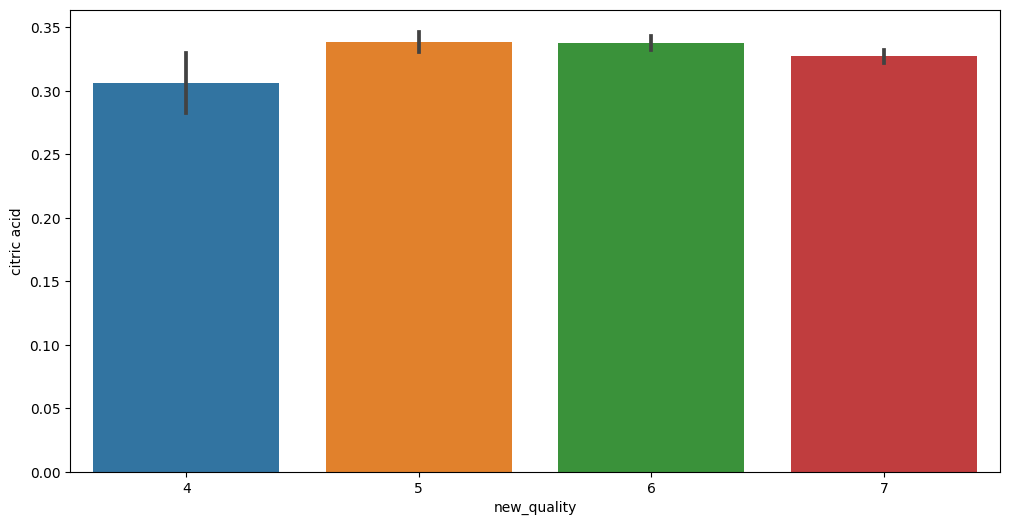

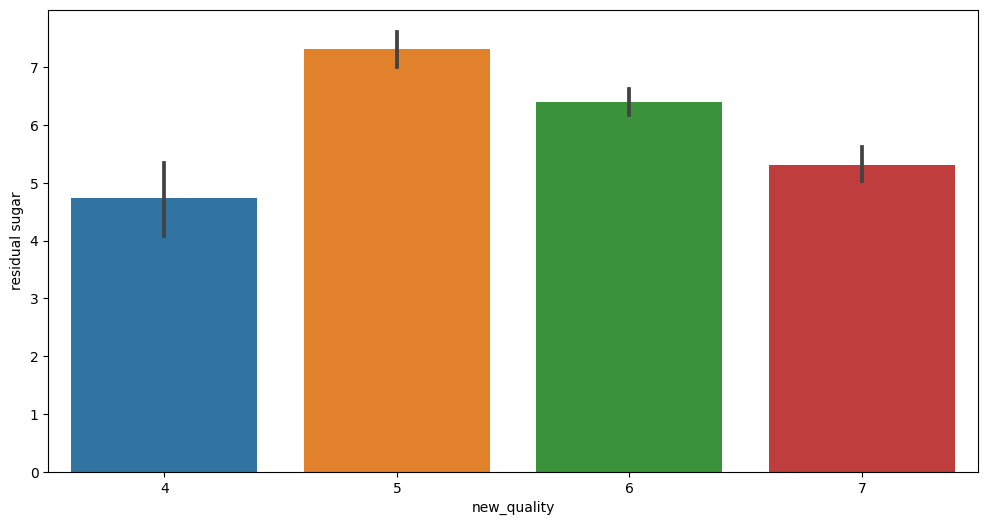

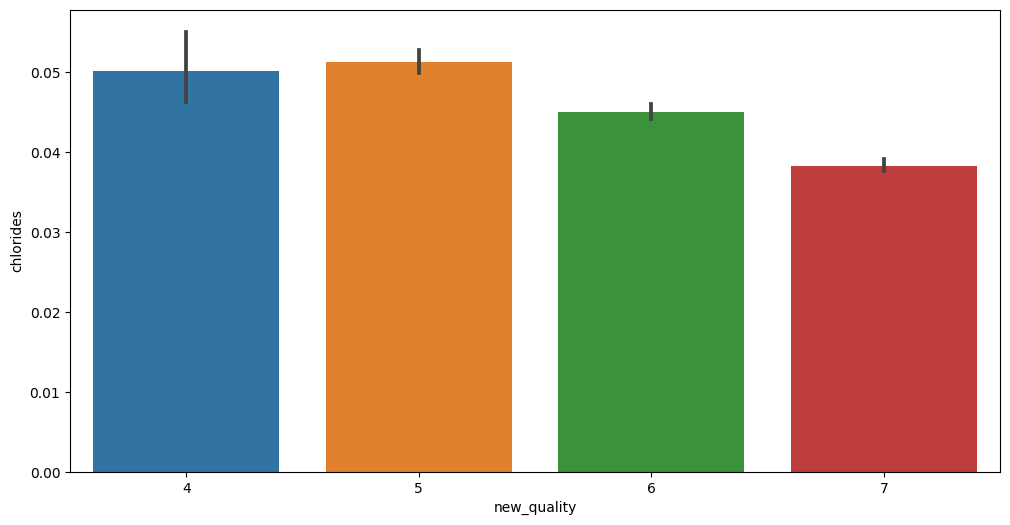

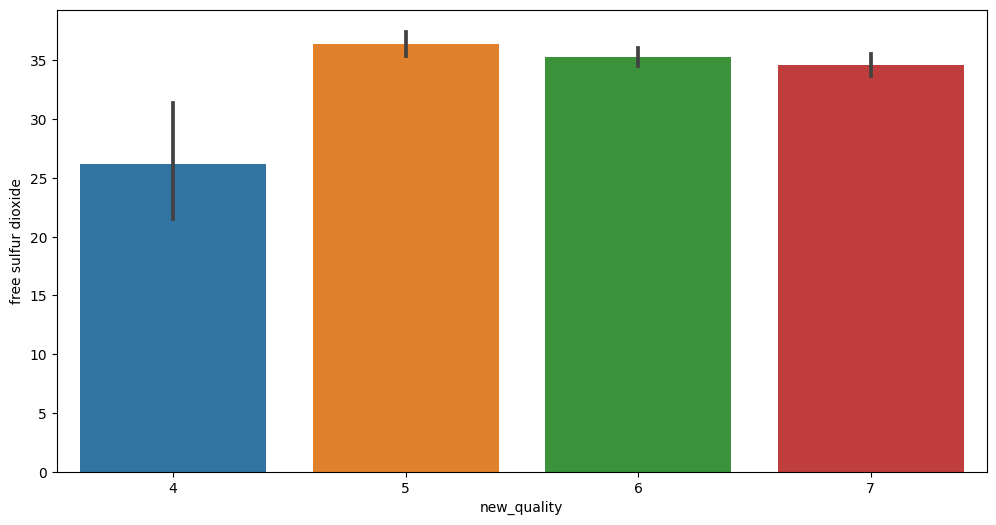

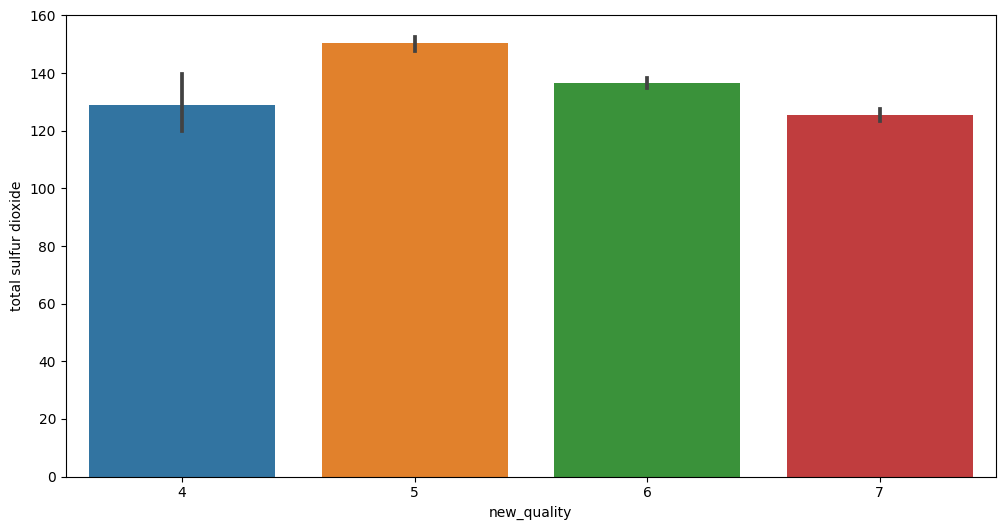

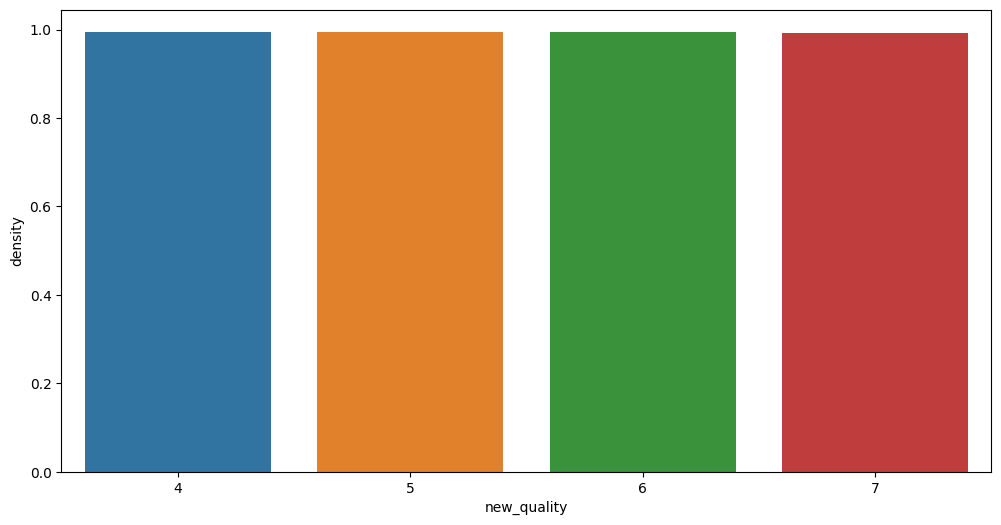

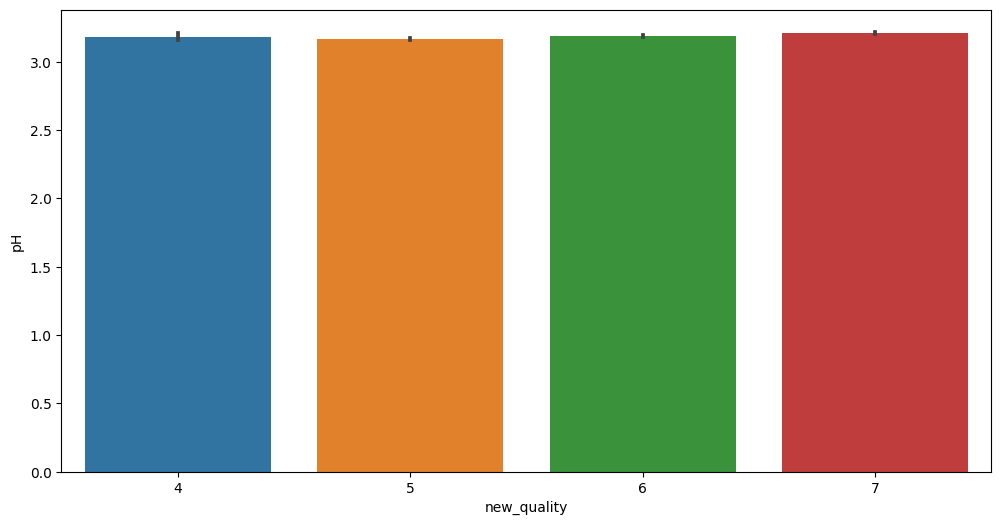

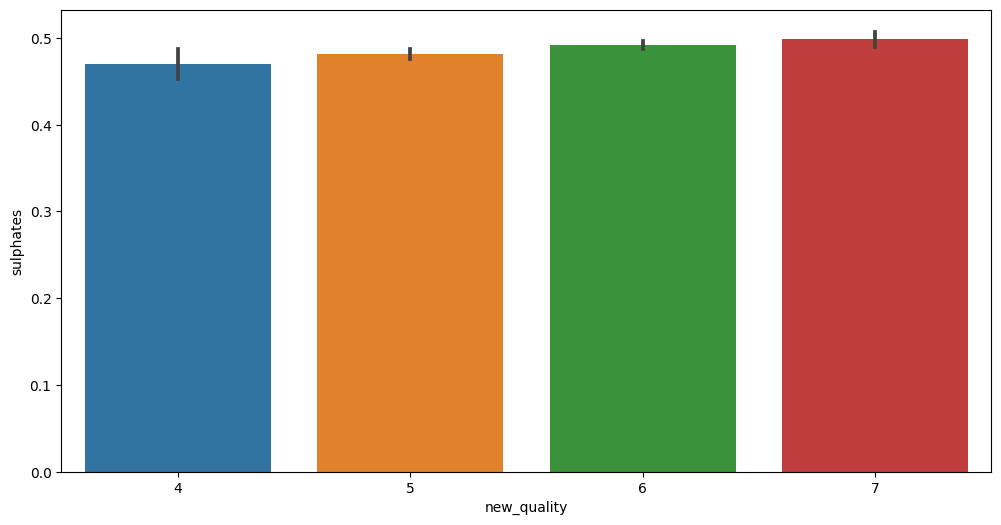

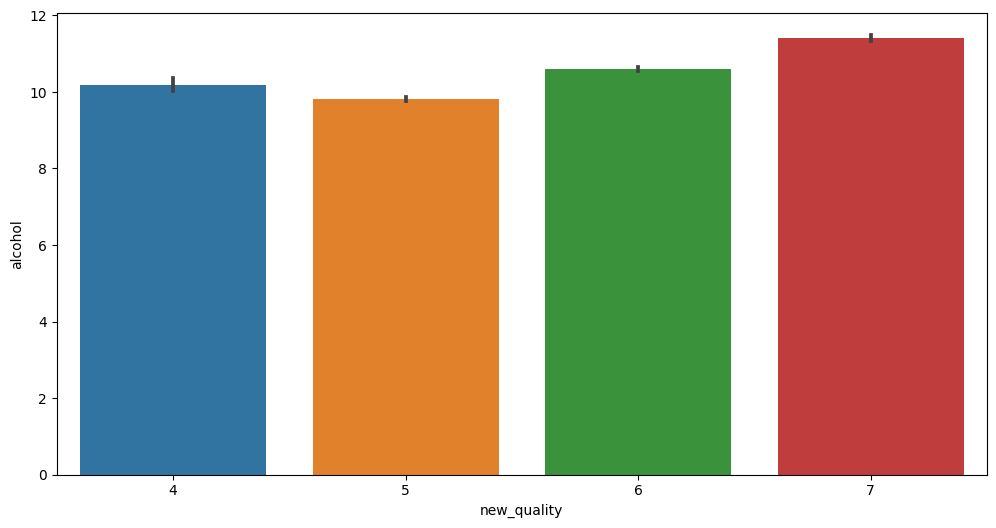

In [24]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'new_quality', 
                y = white_train.columns[i], 
                data = white_train)

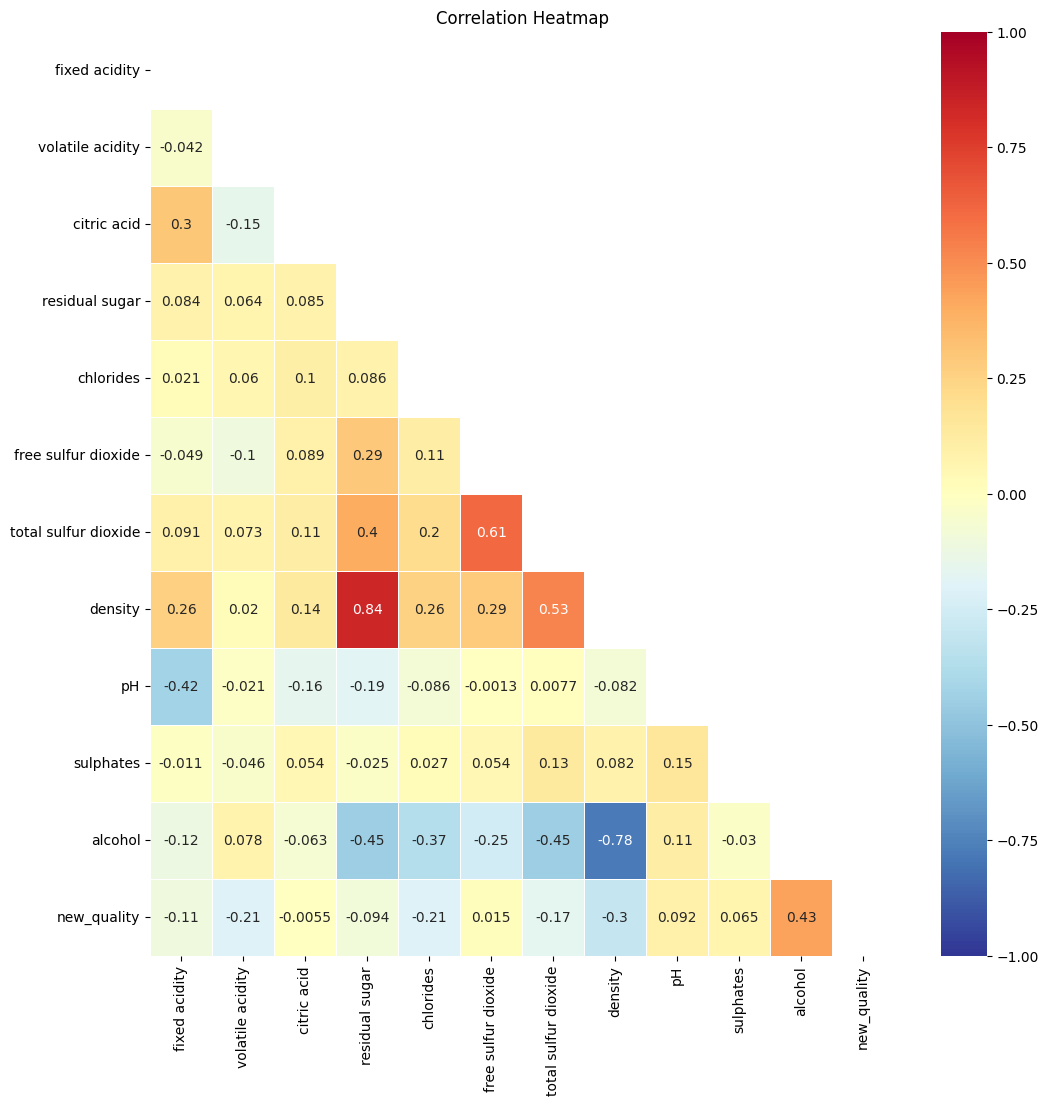

In [25]:
### train의 변수 간 상관관계

# 사이즈 지정
plt.figure(figsize = (12,12))

corr = white_train.corr()

# 삼각형 마스크 만들기(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths = .5,  # 경계면을 실선으로 구분하기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
    - 상관계수는 **0.43**으로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
    - 해당 변수에 이상치가 있다면 제거하는 것을 추후에 고려해 볼 수 있다.
- total sulfur dioxide와 free sulfur dioxide 간 상관관계가 있다.
    - 이름으로 보아 서로 관련있는 변수임을 짐작할 수 있다.
- density와 residual sugar, alcohol, total_sulfur_dioxide 간 강한 상관관계가 있다.

# **3. 기본 Modeling**

## **3-1. 데이터 준비**

In [26]:
### feature / target 분리

white_X = white_train.drop(['new_quality'], axis = 1)
white_y = white_train['new_quality']

In [27]:
white_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
2,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
3,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
4,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0


In [28]:
white_y.head()

0    5
1    5
2    6
3    6
4    6
Name: new_quality, dtype: int32

In [29]:
white_X.shape, white_y.shape

((4159, 11), (4159,))

In [30]:
### 표준화
# 데이터 간의 스케일 차이 조정

from sklearn.preprocessing import StandardScaler

colname = white_X.columns
scaler = StandardScaler() 
white_X = scaler.fit_transform(white_X)
white_X = pd.DataFrame(white_X, columns = colname)
white_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.484093,4.162508,-2.251738,0.084448,-0.168105,-1.539163,-1.266508,0.103171,1.655391,-0.435754,-0.266139
1,1.231568,-0.676136,0.459082,-0.862690,0.530160,-0.831822,0.002220,-0.747828,-0.921294,0.270796,0.301917
2,0.168918,-0.676136,-0.198087,-0.073408,0.018099,-0.360261,-0.702629,-0.036446,0.466152,0.094159,0.220766
3,1.113495,1.219415,-0.608817,0.617214,0.623262,-0.183426,0.942019,0.495428,-0.987363,-0.524073,0.301917
4,-1.011804,-0.875668,0.294790,0.656678,-0.633615,-1.067603,-2.065337,-0.269141,-0.723088,1.507259,1.194577


In [31]:
white_test = scaler.transform(white_test)
white_test = pd.DataFrame(white_test, columns = colname)
white_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.530362,0.321522,1.198396,0.044984,-0.121554,-1.421273,-1.524953,-0.069689,-1.912327,-0.965667,0.869973
1,-0.421443,0.022225,-0.526671,-0.231264,-0.261207,0.523916,0.965514,0.262733,0.003670,1.772216,-0.915346
2,0.405062,-1.274731,0.459082,-0.902154,-0.121554,-0.831822,0.495614,0.262733,2.183942,-0.170798,-0.428441
3,-0.067226,-0.177307,-0.608817,-0.862690,-1.238778,-0.684459,-1.548448,-1.196597,-0.194537,-0.170798,1.032275
4,-0.421443,-0.177307,-0.444525,1.209175,0.018099,2.645940,2.046282,0.944197,-0.062399,-0.700711,-0.428441


- 제대로 표준화되었음을 확인할 수 있다.

In [32]:
### 교차 검증
# target 변수의 클래스가 불균형함
# target의 속성값의 개수를 동일하게 가져오기 위해 StratifiedKFold 활용

from sklearn.model_selection import StratifiedKFold

n_splits = 5 # 폴드 수 지정
skf = StratifiedKFold(n_splits = n_splits, 
                      random_state = 0, shuffle = True)

## **3-2. 기본 단일 모델** 

**📌 a) 선형 알고리즘(Linear Algorithm)**  
- LDA(Linear Discriminant Analysis)
- 경사하강법(SGDClassifier)

**📌 b) 비선형 알고리즘(Non-linear Algorithm)**
- 최소 근접 알고리즘(k-Nearest Neighbors)
- 결정 트리(Decision Tree)
- 가우시안 나이브 베이즈(Gaussian Naive Bayes)
- 서포트 벡터 머신(SVC)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
### 활용할 모델 정의

white_models = []

white_models.append(('LDA', LinearDiscriminantAnalysis()))
white_models.append(('SGD', SGDClassifier()))
white_models.append(('KNN', KNeighborsClassifier()))
white_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
white_models.append(('NB', GaussianNB()))
white_models.append(('SVC', SVC(random_state = 0)))

In [35]:
### 순차적으로 modeling + 학습/예측/검증

white_results = []
white_names = []
white_metrics = []

for name, model in white_models:
    cv_results = cross_val_score(model, white_X, white_y, 
                                 cv = skf, scoring = 'accuracy')
    white_results.append(cv_results)
    white_names.append(name)
    white_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white_metrics),3))

LDA: 0.543
SGD: 0.497
KNN: 0.579
DT: 0.612
NB: 0.472
SVC: 0.586

모든 모델의 평균 메트릭(정확도): 0.548


## **3-3. 기본 앙상블 모델 생성**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
white_ensemble = []

white_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
white_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
white_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
white_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
white_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
white_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
white_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [38]:
### 순차적으로 modeling + 학습/예측/검증

white_en_results = []
white_en_names = []
white_en_metrics = []

for name, model in white_ensemble:
    cv_results = cross_val_score(model, white_X, white_y, 
                                 cv = skf, scoring = 'accuracy')
    white_en_results.append(cv_results)
    white_en_names.append(name)
    white_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white_en_metrics),3))

RF: 0.684
Bagging: 0.654
GB: 0.602
XGB: 0.673
LGBM: 0.654
Ada: 0.515
ET: 0.686

모든 모델의 평균 메트릭(정확도): 0.638


# **4. 데이터 변환**
- 왜곡이 심한 변수들에 대해 로그 변환 수행
    - 왜도(skewness)가 1 이상인 변수들만 변환

In [39]:
### 원본 데이터 유지를 위해 복사본 활용

white_train_2nd = white_train.copy()
white_train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,5
1,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5
2,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,6
3,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,6
4,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,6


In [40]:
### 각 변수들의 왜도(skewness) 확인
# 왜도 측정은 표준화되지 않은 원본 데이터로 수행

from scipy.stats import skew

features_idx = white_train_2nd.dtypes[white_train_2nd.dtypes != 'object'].index
skew_features = white_train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.202629


In [41]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides              4.991482
volatile acidity       1.562741
free sulfur dioxide    1.528219
citric acid            1.327980
residual sugar         1.149807
density                1.103999
dtype: float64


In [42]:
### 로그 변환 적용
# 데이터를 변환하기 위해서는 데이터가 양수여야 함
# 따라서, 모든 데이터에 1을 더해준 후 로그 변환 수행

from scipy import stats

skewed = list(skew_features_top.index)

for ftr in skewed:
    white_train_2nd[ftr] = np.log1p(white_train_2nd[ftr])

white_train_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,5.6,0.527683,0.058269,2.054124,0.041142,2.302585,84.0,0.690303,3.44,0.44,10.2,5
1,7.9,0.190620,0.329304,1.098612,0.055435,3.091042,138.0,0.689019,3.05,0.52,10.9,5
2,7.0,0.190620,0.270027,1.945910,0.044973,3.401197,108.0,0.690093,3.26,0.50,10.8,6
3,7.8,0.336472,0.231112,2.351375,0.057325,3.496508,178.0,0.690895,3.04,0.43,10.9,6
4,6.0,0.173953,0.314811,2.370244,0.031499,2.890372,50.0,0.689741,3.08,0.66,12.0,6


In [43]:
### 각 변수들의 왜도(skewness) 확인

features_idx = white_train_2nd.dtypes[white_train_2nd.dtypes != 'object'].index
skew_features = white_train_2nd[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 0.777173


In [44]:
### 왜도가 1 이상인 변수 파악

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

chlorides           4.594012
volatile acidity    1.133981
density             1.076991
dtype: float64


- 데이터 왜곡 정도가 완화됨

In [45]:
### feature / target 분리

white_X_2nd = white_train_2nd.drop(['new_quality'], axis = 1)
white_y_2nd = white_train_2nd['new_quality']

In [46]:
### 표준화 재수행

colname = white_X_2nd.columns
scaler = StandardScaler() 
white_X_2nd = scaler.fit_transform(white_X_2nd)
white_X_2nd = pd.DataFrame(white_X_2nd, columns = colname)
white_X_2nd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-1.484093,3.812827,-2.567657,0.420810,-0.166343,-2.217249,-1.266508,0.104001,1.655391,-0.435754,-0.266139
1,1.231568,-0.689400,0.511036,-0.902937,0.562624,-0.714663,0.002220,-0.748109,-0.921294,0.270796,0.301917
2,0.168918,-0.689400,-0.162289,0.270893,0.029069,-0.123592,-0.702629,-0.035723,0.466152,0.094159,0.220766
3,1.113495,1.258780,-0.604330,0.832616,0.659038,0.058043,0.942019,0.496403,-0.987363,-0.524073,0.301917
4,-1.011804,-0.912026,0.346409,0.858756,-0.658175,-1.097087,-2.065337,-0.268663,-0.723088,1.507259,1.194577


### **a) 단일 모델**

In [47]:
### 활용할 모델 정의

white2_models = []

white2_models.append(('LDA', LinearDiscriminantAnalysis()))
white2_models.append(('SGD', SGDClassifier()))
white2_models.append(('KNN', KNeighborsClassifier()))
white2_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
white2_models.append(('NB', GaussianNB()))
white2_models.append(('SVC', SVC(random_state = 0)))

In [48]:
### 순차적으로 modeling + 학습/예측/검증
white2_results = []
white2_names = []
white2_metrics = []

for name, model in white2_models:
    cv_results = cross_val_score(model, white_X_2nd, white_y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    white2_results.append(cv_results)
    white2_names.append(name)
    white2_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white2_metrics),3))

LDA: 0.544
SGD: 0.504
KNN: 0.579
DT: 0.613
NB: 0.491
SVC: 0.590

모든 모델의 평균 메트릭(정확도): 0.553


### **b) 앙상블 모델**

In [49]:
white2_ensemble = []

white2_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
white2_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
white2_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
white2_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
white2_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
white2_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
white2_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [50]:
### 순차적으로 modeling + 학습/예측/검증

white2_en_results = []
white2_en_names = []
white2_en_metrics = []

for name, model in white2_ensemble:
    cv_results = cross_val_score(model, white_X_2nd, white_y_2nd, 
                                 cv = skf, scoring = 'accuracy')
    white2_en_results.append(cv_results)
    white2_en_names.append(name)
    white2_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white2_en_metrics),3))

RF: 0.686
Bagging: 0.655
GB: 0.601
XGB: 0.672
LGBM: 0.660
Ada: 0.515
ET: 0.696

모든 모델의 평균 메트릭(정확도): 0.641


- 성능이 조금씩 향상되었음
    - white wine의 경우 **로그 변환** 적용

# **5. 변수들 간의 상관도**

## **5-1. target 변수와의 상관도**

- target 변수와 가장 상관도가 높은 변수는 alcohol이다.
- 해당 변수의 이상치를 제거해보자.

In [58]:
### 데이터 원본을 유지하기 위해 복사본 활용

white_X_3rd = white_X_2nd.copy()
white_y_3rd = white_y_2nd.copy()

In [59]:
white_train_3 = pd.concat([white_X_3rd, white_y_3rd], axis = 1)

In [60]:
### 이상치 제거 함수

def get_outlier(df = None, column = None, weight = 1.5):
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함 
    df = df[column]
    quantile_25 = np.percentile(df.values, 25)
    quantile_75 = np.percentile(df.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = df[(df < lowest_val) | (df > highest_val)].index
    
    return outlier_index

In [61]:
### alcohol에서 이상치 찾기

outlier_index = get_outlier(df = white_train_3, column = 'alcohol', weight = 1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([], dtype='int64')


- 이상치가 존재 x

## **5-2. feature 변수들 간의 상관도**

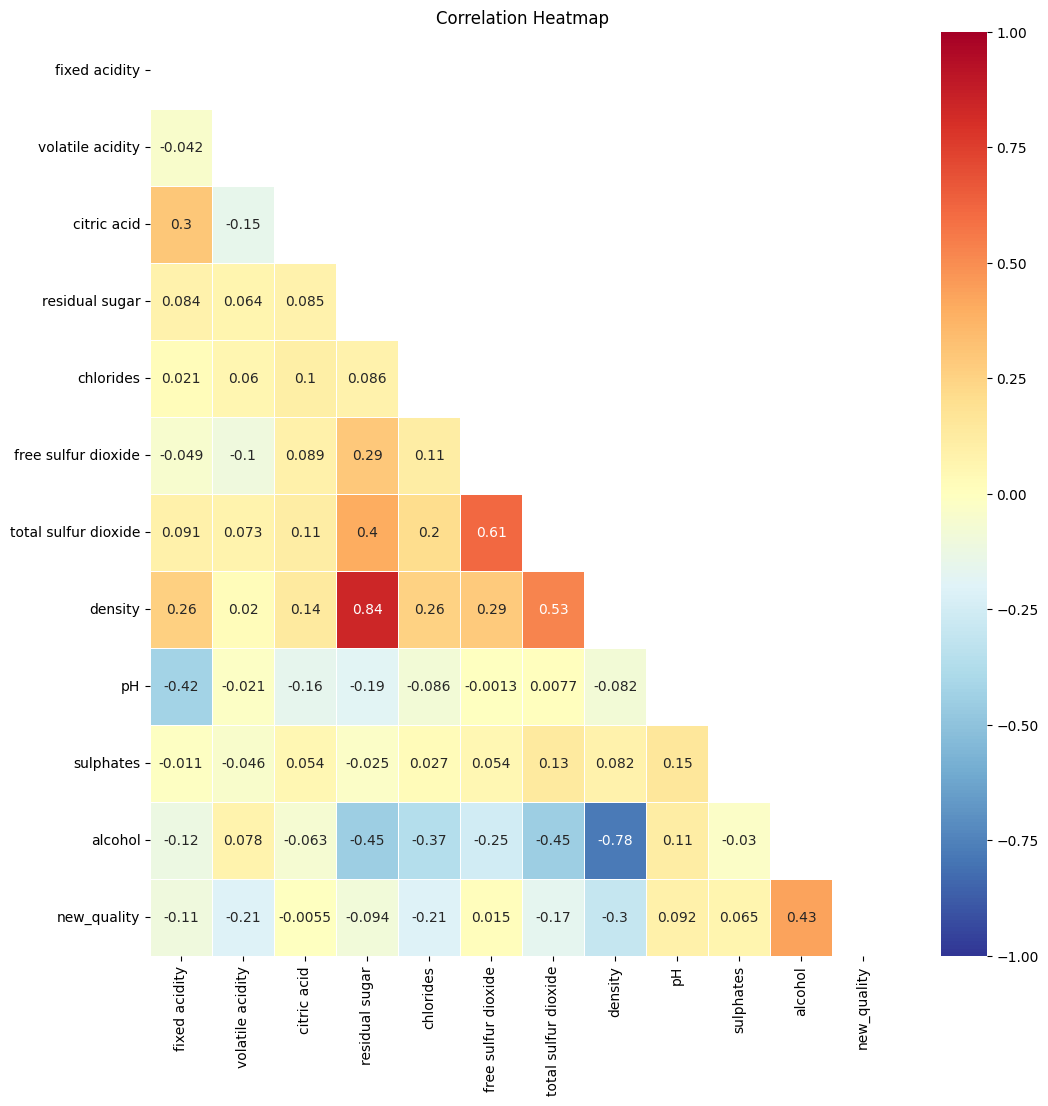

- target 변수(quality)와 상관도가 가장 높은 변수는 'alcohol'이다.
    - 상관계수는 **0.43**으로, 약한 양의 선형 상관관계를 가진다고 할 수 있다.
- total sulfur dioxide와 free sulfur dioxide 간 상관관계가 있다.
    - target 변수와 상관도가 조금 더 높은 ```free sulfur dioxide```만 남김
- density와 residual sugar, alcohol, total_sulfur_dioxide 간 강한 상관관계가 있다.
    - ```density```는 산도와 당도 등 여러 가지를 종합하여 사람이 맛으로 느끼는 바디감 등을 수치화 한 것으로, 다른 변수들을 통해 관련된 정보들을 도출할 수 있다. -> 삭제 결정

> 최종 삭제 변수: density, free sulfur dioxide

- 변수 판단 기준: 아래 링크 활용
    - [와인상식](http://the-scent.co.kr/bbs/board.php?bo_table=wine_how_to&wr_id=29&page=7)

⭐ **이후 최종 예측 시 test에서도 해당 변수들을 제거해 주는 거 잊지 말기!**

In [62]:
### 데이터 원본을 유지하기 위해 복사본 활용
# 로그 변환된 2번째 데이터를 계속 활용

white_X_4th = white_X_2nd.copy()
white_y_4th = white_y_2nd.copy()

In [63]:
white_train_4 = pd.concat([white_X_4th, white_y_4th], axis = 1)

In [64]:
white_train_4 = white_train_4.drop(['density', 'free sulfur dioxide'], axis = 1)
white_train_4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,new_quality
0,-1.484093,3.812827,-2.567657,0.420810,-0.166343,-1.266508,1.655391,-0.435754,-0.266139,5
1,1.231568,-0.689400,0.511036,-0.902937,0.562624,0.002220,-0.921294,0.270796,0.301917,5
2,0.168918,-0.689400,-0.162289,0.270893,0.029069,-0.702629,0.466152,0.094159,0.220766,6
3,1.113495,1.258780,-0.604330,0.832616,0.659038,0.942019,-0.987363,-0.524073,0.301917,6
4,-1.011804,-0.912026,0.346409,0.858756,-0.658175,-2.065337,-0.723088,1.507259,1.194577,6


In [65]:
### feature/target 분리

X_4th = white_train_4.drop(['new_quality'], axis = 1)
y_4th = white_train_4['new_quality']

### **a) 단일 모델**

In [66]:
### 활용할 모델 정의

white4_models = []

white4_models.append(('LDA', LinearDiscriminantAnalysis()))
white4_models.append(('SGD', SGDClassifier()))
white4_models.append(('KNN', KNeighborsClassifier()))
white4_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
white4_models.append(('NB', GaussianNB()))
white4_models.append(('SVC', SVC(random_state = 0)))

In [67]:
### 순차적으로 modeling + 학습/예측/검증
white4_results = []
white4_names = []
white4_metrics = []

for name, model in white4_models:
    cv_results = cross_val_score(model, white_X_4th, white_y_4th, 
                                 cv = skf, scoring = 'accuracy')
    white4_results.append(cv_results)
    white4_names.append(name)
    white4_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white4_metrics),3))

LDA: 0.544
SGD: 0.501
KNN: 0.579
DT: 0.613
NB: 0.491
SVC: 0.590

모든 모델의 평균 메트릭(정확도): 0.553


### **b) 앙상블 모델**

In [68]:
white4_ensemble = []

white4_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
white4_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
white4_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
white4_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
white4_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
white4_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
white4_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [69]:
### 순차적으로 modeling + 학습/예측/검증

white4_en_results = []
white4_en_names = []
white4_en_metrics = []

for name, model in white4_ensemble:
    cv_results = cross_val_score(model, white_X_4th, white_y_4th, 
                                 cv = skf, scoring = 'accuracy')
    white4_en_results.append(cv_results)
    white4_en_names.append(name)
    white4_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white4_en_metrics),3))

RF: 0.686
Bagging: 0.655
GB: 0.601
XGB: 0.672
LGBM: 0.660
Ada: 0.515
ET: 0.696

모든 모델의 평균 메트릭(정확도): 0.641


- 성능에 별다른 개선은 x

**⭐ 데이터는 로그 변환된 ```white_X_2nd```와 ```white_y_2nd```를 계속해서 활용**

# **6. 데이터 불균형 처리**

## **6-1. 클래스 가중치 부여(Weight Balancing)**

- 관련 코드 같은 걸 찾기는 했는데,, 잘못 적용한 건지 성능이 너무 떨어져서 지웠습니다...ㅎ  
(원래는 가중치 주면 비슷하거나 성능이 올라가면 올라가지 내려가는 경우는 거의 없음,,)
- 혹시 활용할 사람 있을까봐 링크 남겨둘게용
    - [Reference](https://medium.com/grabngoinfo/balanced-weights-for-imbalanced-classification-465f0e13c5ad)

## **6-2. SMOTE**
- 클래스를 모아도 클래스 간의 불균형이 해결되지는 x
    - 오버샘플링 적용

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
white_X_over, white_y_over = smote.fit_resample(white_X_2nd, white_y_2nd)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', white_X_2nd.shape, white_y_2nd.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', white_X_over.shape, white_y_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(white_y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4159, 11) (4159,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7524, 11) (7524,)
SMOTE 적용 후 레이블 값 분포: 
 5    1881
6    1881
7    1881
4    1881
Name: new_quality, dtype: int64


- SMOTE 적용 후 클래스 4의 경우 11배 이상 데이터가 증가함
- 클래스 7의 경우 3배 정도 증가

### **a) 단일 모델**

In [71]:
### 활용할 모델 정의

white5_models = []

white5_models.append(('LDA', LinearDiscriminantAnalysis()))
white5_models.append(('SGD', SGDClassifier()))
white5_models.append(('KNN', KNeighborsClassifier()))
white5_models.append(('DT', DecisionTreeClassifier(random_state = 0)))
white5_models.append(('NB', GaussianNB()))
white5_models.append(('SVC', SVC(random_state = 0)))

In [72]:
### 순차적으로 modeling + 학습/예측/검증

white5_results = []
white5_names = []
white5_metrics = []

for name, model in white5_models:
    cv_results = cross_val_score(model, white_X_over, white_y_over, 
                                 cv = skf, scoring = 'accuracy')
    white5_results.append(cv_results)
    white5_names.append(name)
    white5_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white5_metrics),3))

LDA: 0.541
SGD: 0.504
KNN: 0.749
DT: 0.746
NB: 0.522
SVC: 0.667

모든 모델의 평균 메트릭(정확도): 0.622


### **b) 앙상블 모델**

In [73]:
white5_ensemble = []

white5_ensemble.append(('RF', RandomForestClassifier(random_state = 0)))
white5_ensemble.append(('Bagging',BaggingClassifier(DecisionTreeClassifier(), random_state = 0)))
white5_ensemble.append(('GB', GradientBoostingClassifier(random_state = 0)))
white5_ensemble.append(('XGB', XGBClassifier(random_state = 0)))
white5_ensemble.append(('LGBM', LGBMClassifier(random_state = 0)))
white5_ensemble.append(('Ada', AdaBoostClassifier(random_state = 0)))
white5_ensemble.append(('ET', ExtraTreesClassifier(random_state = 0)))

In [74]:
### 순차적으로 modeling + 학습/예측/검증

white5_en_results = []
white5_en_names = []
white5_en_metrics = []

for name, model in white5_ensemble:
    cv_results = cross_val_score(model, white_X_over, white_y_over, 
                                 cv = skf, scoring = 'accuracy')
    white5_en_results.append(cv_results)
    white5_en_names.append(name)
    white5_en_metrics.append(cv_results.mean())
    msg = "%s: %.3f" % (name, cv_results.mean())
    print(msg)

print()
print('모든 모델의 평균 메트릭(정확도):',round(np.mean(white5_en_metrics),3))

RF: 0.834
Bagging: 0.791
GB: 0.688
XGB: 0.814
LGBM: 0.815
Ada: 0.551
ET: 0.845

모든 모델의 평균 메트릭(정확도): 0.763


- 성능이 크게 **향상됨**

# **7. 최종 예측 모델**

- 최종 예측 모델로 성능이 가장 좋은 **ExtraTrees** 모델 활용
- **Oversampling** 된 데이터로 학습
- 해당 모델에 대해 **하이퍼 파라미터 튜닝**을 적용해 보자.
- [extraTrees 설명](https://velog.io/@nata0919/Extra-Trees-%EC%A0%95%EB%A6%AC)

In [75]:
from sklearn.model_selection import GridSearchCV

In [77]:
params = {
    'n_estimators' : [200, 300, 400, 500, 600],
}

### 모델 객체
et = ExtraTreesClassifier(random_state = 0)

skf = StratifiedKFold(n_splits = 5, 
                      random_state = 0, shuffle = True)
grid = GridSearchCV(estimator = et, param_grid = params, 
                    scoring = 'accuracy', cv = skf)
grid_result = grid.fit(white_X_over, white_y_over)

print("최적 모델: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

최적 모델: 0.848748 using {'n_estimators': 200}


In [78]:
fin_model = ExtraTreesClassifier(n_estimators = 200, random_state = 0)
fin_model.fit(white_X_over, white_y_over)

ExtraTreesClassifier(n_estimators=200, random_state=0)

In [80]:
y_white_pred = fin_model.predict(white_test)

# **8. 제출 파일 생성**

In [81]:
### 레드 와인 예측 결과와 결합하기

submission = pd.read_csv('./data/red_submission.csv')

In [82]:
submission.iloc[white_idx,-1] =  y_white_pred
submission

,index,quality
0,0,4
1,1,6
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [83]:
# csv 파일로 저장

submission.to_csv('./data/final_submission.csv', index = False)